Multithreaded Time:  0.2950613498687744
Single-threaded Time:  0.0


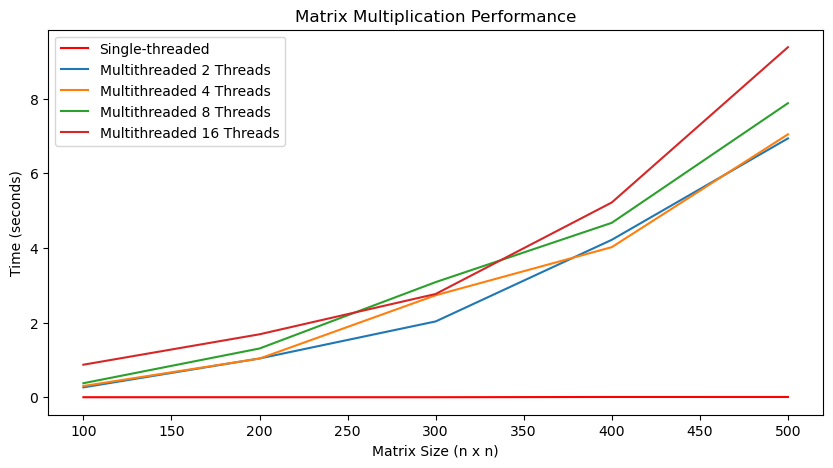

In [4]:
import threading
import numpy as np
import time

def matrix_multiply_slice(result, A, B, row_index, col_start, col_end):
    for i in range(col_start, col_end):
        result[row_index][i] = np.dot(A[row_index, :], B[:, i])

def matrix_multiply_multithreaded(A, B, num_threads):
    rows, cols = A.shape[0], B.shape[1]
    result = np.zeros((rows, cols))
    threads = []
    col_chunk_size = cols // num_threads
    for i in range(num_threads):
        col_start = i * col_chunk_size
        col_end = cols if i == num_threads - 1 else (i + 1) * col_chunk_size
        for row_index in range(rows):
            thread = threading.Thread(target=matrix_multiply_slice, args=(result, A, B, row_index, col_start, col_end))
            threads.append(thread)
            thread.start()
    for thread in threads:
        thread.join()
    return result

def matrix_multiply_single_threaded(A, B):
    return np.dot(A, B)

A = np.random.rand(100, 100)
B = np.random.rand(100, 100)

start_time = time.time()
multithreaded_result = matrix_multiply_multithreaded(A, B, 4)  # Using 4 threads
end_time = time.time()
multithreaded_time = end_time - start_time

start_time = time.time()
single_threaded_result = matrix_multiply_single_threaded(A, B)
end_time = time.time()
single_threaded_time = end_time - start_time

print("Multithreaded Time: ", multithreaded_time)
print("Single-threaded Time: ", single_threaded_time)

import matplotlib.pyplot as plt

def run_benchmarks(sizes, thread_counts):
    multithreaded_times = {}
    single_thread_times = []

    for size in sizes:
        A = np.random.rand(size, size)
        B = np.random.rand(size, size)

        # Single-threaded
        start_time = time.time()
        single_threaded_result = matrix_multiply_single_threaded(A, B)
        end_time = time.time()
        single_thread_time = end_time - start_time
        single_thread_times.append(single_thread_time)

        # Multithreaded with varying thread counts
        multithreaded_times[size] = []
        for count in thread_counts:
            start_time = time.time()
            multithreaded_result = matrix_multiply_multithreaded(A, B, count)
            end_time = time.time()
            multithreaded_time = end_time - start_time
            multithreaded_times[size].append(multithreaded_time)

    return single_thread_times, multithreaded_times

# Plot the results
def plot_results(sizes, single_thread_times, multithreaded_times, thread_counts):
    plt.figure(figsize=(10, 5))
    plt.plot(sizes, single_thread_times, label='Single-threaded', color='red')
    for i, count in enumerate(thread_counts):
        times = [multithreaded_times[size][i] for size in sizes]
        plt.plot(sizes, times, label=f'Multithreaded {count} Threads')
    plt.xlabel('Matrix Size (n x n)')
    plt.ylabel('Time (seconds)')
    plt.title('Matrix Multiplication Performance')
    plt.legend()
    plt.show()

sizes = [100, 200, 300, 400, 500]
thread_counts = [2, 4, 8, 16]
single_thread_times, multithreaded_times = run_benchmarks(sizes, thread_counts)
plot_results(sizes, single_thread_times, multithreaded_times, thread_counts)